# **Chapter 02. 파이썬을 활용한 데이터 전처리**

## 2-14. 실습 예제
> 이번 파트에서는, **앞서 배운 Pandas 의 전처리 기법들을 활용**해서, <br>
> **분석 데이터 수집부터, 전처리, 분석/시각화 A-Z 실습을 진행합니다.**  <br>
> 진행하면서 혹시 익숙하지 않은 부분이 있다면, 앞선 강의를 통한 복습을 권장합니다!

> Colab 한글 깨짐 현상 해결 방법
> - Step 1. 폰트 설치 (아래 코드 실행)
> - Step 2. 런타임 재시작 (런타임 > 런타임 다시 시작)
> - Step 3. 라이브러리 임포트 (폰트 설치 이후 코드 실행)

In [1]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import numpy as np

# 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=20).get_name() # 기본 폰트 사이즈 : 20
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

###  **2-14-1. 분석 데이터 수집**

> - 이번 실습에서는 기본적으로 **Pandas 의 크롤링(Crawling) 기능을 활용**해 **K-pop 아이돌 정보 데이터를 수집/분석합니다.**
> - 크롤링 과정에 문제가 있을 경우, **강의자료와 함께 첨부된 .csv 데이터**를 사용하거나, 아래 **다운로드 링크에서 받아서 사용**하셔도 됩니다.
> - 다운로드 1 : [kpop_idols.csv](https://docs.google.com/uc?export=download&id=1-2OsTtqS7Ci3uadVHFsPNbJZBNpevloi)
> - 다운로드 2 : [kpop_boys.csv](https://docs.google.com/uc?export=download&id=10_kZzQM8RCIEBtaOo8gW-BsxcEWwBdhb)
> - 다운로드 3 : [kpop_girls.csv](https://docs.google.com/uc?export=download&id=10xGIkuhyDL6D3H1R_BwUQ1hd5ccq269I)

> **크롤링(Crawling)** 데이터 수집

In [74]:
# 코드를 입력해 주세요
import requests
site1 = 'https://dbkpop.com/db/all-k-pop-idols'  # K-pop 아이돌 전체 정보
site2 = 'https://dbkpop.com/db/k-pop-girlgroups' # K-pop 여자 그룹 정보
site3 = 'https://dbkpop.com/db/k-pop-boybands'   # K-pop 남자 그룹 정보

r1 = requests.get(site1)
r2 = requests.get(site2)
r3 = requests.get(site3)

all_df = pd.read_html(r1.text, displayed_only=False)[0]
all_df.columns = all_df.columns.get_level_values(0)

girl_df = pd.read_html(r2.text, displayed_only=False)[0]
girl_df.columns = girl_df.columns.get_level_values(0)

boy_df = pd.read_html(r3.text, displayed_only=False)[0]
boy_df.columns = boy_df.columns.get_level_values(0)

> 데이터 기본 정보 확인
- 처음 데이터를 입수하고나면, 가장 먼저 데이터에 어떤 정보(컬럼)들이 있는지, 데이터 길이, 결측값 정보 등을 확인한다.

In [4]:
all_df.head()

,Profile,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender,Position,Instagram,Twitter
0,Profile,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160,44,Jeonju,"TTS, Oh!GG",NaN,F,"Leader, Main Vocalist",taeyeon_ss,NaN
1,NaN,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158,43,California,NaN,NaN,F,NaN,svnnynight,NaN
2,NaN,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163,50,San Francisco,TTS,NaN,F,NaN,xolovestephi,NaN
3,NaN,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48,Incheon,NaN,NaN,F,NaN,watasiwahyo,NaN
4,NaN,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45,Goyang,NaN,NaN,F,NaN,yulyulk,NaN


In [7]:
girl_df.head()

,Profile,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,Profile,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,SONE,Yes
1,NaN,KARA,NaN,카라,2007-03-29,DSP,4,5,Kamilia,No
2,NaN,2NE1,NaN,투애니원,2009-05-06,YG,4,4,Blackjack,No
3,Profile,T-ara,NaN,티아라,2009-07-29,MBK,4,6,QUEEN'S,Hiatus
4,Profile,SISTAR,NaN,씨스타,2010-03-06,Starship,4,4,STAR1,No


In [8]:
boy_df.head()

,Profile,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,Profile,BIGBANG,NaN,빅뱅,2006-08-19,YG,4,5,VIP,Yes
1,Profile,Super Junior,SJ,슈퍼주니어,2005-11-06,SM,11,12,ELF,Yes
2,NaN,TVXQ!,TVXQ,동방신기,2003-12-26,SM,2,5,Cassiopeia,Yes
3,Profile,SHINee,NaN,샤이니,2008-05-25,SM,4,5,Shawol,Yes
4,Profile,EXO,NaN,엑소,2012-04-08,SM,9,12,EXO-L,Yes


In [9]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Profile         459 non-null    object
 1   Stage Name      1666 non-null   object
 2   Full Name       1659 non-null   object
 3   Korean Name     1658 non-null   object
 4   K. Stage Name   1665 non-null   object
 5   Date of Birth   1666 non-null   object
 6   Group           1528 non-null   object
 7   Country         1666 non-null   object
 8   Second Country  58 non-null     object
 9   Height          1666 non-null   int64 
 10  Weight          1666 non-null   int64 
 11  Birthplace      769 non-null    object
 12  Other Group     137 non-null    object
 13  Former Group    250 non-null    object
 14  Gender          1666 non-null   object
 15  Position        77 non-null     object
 16  Instagram       156 non-null    object
 17  Twitter         12 non-null     object
dtypes: int64

In [10]:
girl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Profile       97 non-null     object
 1   Name          200 non-null    object
 2   Short         28 non-null     object
 3   Korean Name   200 non-null    object
 4   Debut         200 non-null    object
 5   Company       200 non-null    object
 6   Members       200 non-null    int64 
 7   Orig. Memb.   200 non-null    int64 
 8   Fanclub Name  54 non-null     object
 9   Active        200 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [11]:
boy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Profile       67 non-null     object
 1   Name          194 non-null    object
 2   Short         22 non-null     object
 3   Korean Name   194 non-null    object
 4   Debut         194 non-null    object
 5   Company       193 non-null    object
 6   Members       194 non-null    int64 
 7   Orig. Memb.   194 non-null    int64 
 8   Fanclub Name  71 non-null     object
 9   Active        194 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.3+ KB


### **2-14-2. 데이터 전처리**

> 필요한 컬럼만 가져오기
- 데이터 크기가 클 경우, 모든 컬럼을 사용하면 가독성이 떨어짐과 동시에 연산도 느려진다.

In [75]:
# 사용할 컬럼
all_cols = ['K. Stage Name', 'Date of Birth', 'Group', 'Country', 'Height', 'Gender']
girl_cols = ['Name', 'Short', 'Korean Name', 'Debut', 'Company', 'Members', 'Orig. Memb.', 'Active']
boy_cols = ['Name', 'Short', 'Korean Name', 'Debut', 'Company', 'Members', 'Orig. Memb.', 'Active']

In [76]:
# 컬럼 필터링
all_df = all_df[all_cols]
girl_df = girl_df[girl_cols]
boy_df = boy_df[boy_cols]

In [77]:
all_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender
0,태연,1989-03-09,SNSD,South Korea,160,F
1,써니,1989-05-15,SNSD,South Korea,158,F
2,티파니,1989-08-01,SNSD,South Korea,163,F
3,효연,1989-09-22,SNSD,South Korea,158,F
4,유리,1989-12-05,SNSD,South Korea,167,F
...,...,...,...,...,...,...
1661,민지,2004-05-07,NewJeans,South Korea,169,F
1662,하니,2004-10-06,NewJeans,Vietnam,162,F
1663,다니엘,2005-04-11,NewJeans,South Korea,165,F
1664,해린,2006-05-15,NewJeans,South Korea,165,F


> 데이터 프레임 합치기 (merge)
- 데이터 프레임이 여러 개일 경우에, 공통된 키(컬럼)을 기준으로 데이터를 합칠 수 있다.
- 실습 데이터처럼 공동된 키(컬럼)이 고정되어 있지 않은 경우도 있을 수 있다.
- 이럴 경우, merge 기준이 될 고통 키를 임의로 만들어 준다.

In [78]:
all_df, girl_df

(     K. Stage Name Date of Birth     Group      Country  Height Gender
 0               태연    1989-03-09      SNSD  South Korea     160      F
 1               써니    1989-05-15      SNSD  South Korea     158      F
 2              티파니    1989-08-01      SNSD  South Korea     163      F
 3               효연    1989-09-22      SNSD  South Korea     158      F
 4               유리    1989-12-05      SNSD  South Korea     167      F
 ...            ...           ...       ...          ...     ...    ...
 1661            민지    2004-05-07  NewJeans  South Korea     169      F
 1662            하니    2004-10-06  NewJeans      Vietnam     162      F
 1663           다니엘    2005-04-11  NewJeans  South Korea     165      F
 1664            해린    2006-05-15  NewJeans  South Korea     165      F
 1665            혜인    2008-04-21  NewJeans  South Korea     170      F
 
 [1666 rows x 6 columns],
                   Name Short Korean Name       Debut    Company  Members  \
 0    Girls' Generation  SNSD  

위의 데이터를 보면 all_df의 Group의 SNSD가 girl_df의 Short의 SNSD가 공통된 것을 확인할 수 있다.<br>

하지만 girl_df의 값들을 보면 NaN의 값이 대부분이기 때문에 겹치지 않아서 어려울 거 같다.<br>

girl_df의 Name이랑 합치자고 하니, 아예 겹치는 부분 자체가 없어서 힘들 거 같다.<br>

이렇듯 현실의 데이터는 대부분 겹치는 데이터가 제대로 없기 마련이다.<br>

따라서 데이터를 겹치게 만들어 준다.

#### **1. 공통 키(컬럼) 만들기**

In [79]:
# 결측 값 치환 => Name과 Short를 합치기 위해 결측값을 임의의 값(언더바; _)로 바꿔보겠다
girl_df['Name'] = girl_df['Name'].fillna('_')
girl_df['Short'] = girl_df['Short'].fillna('_')

In [80]:
girl_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
1,KARA,_,카라,2007-03-29,DSP,4,5,No
2,2NE1,_,투애니원,2009-05-06,YG,4,4,No
3,T-ara,_,티아라,2009-07-29,MBK,4,6,Hiatus
4,SISTAR,_,씨스타,2010-03-06,Starship,4,4,No
...,...,...,...,...,...,...,...,...
195,Kep1er,_,케플러,2022-03-01,WakeOne,9,9,Yes
196,Hi-L,_,하이엘,2021-08-11,Kpop Live,6,6,Yes
197,H1-KEY,_,하이키,2022-01-05,GLG,4,4,Yes
198,CLASS:y,_,클래씨,2022-05-05,Universal,7,7,Yes


NaN의 결측값이 언더바(_)로 바뀐 것을 확인 할 수 있다.<br>

결측값과 어떠한 데이터가 있는 값을 합치려고 하면 에러가 발생하기 때문에 임의의 더미값을 생성해준 것이다.

In [81]:
# 공통 컬럼(Group) 생성
girl_df['Group'] = girl_df['Name'] + '|' + girl_df['Short']
# 이는 'Name'이라는 컬럼과 'Short'라는 컬럼을 수직바(|)를 기준으로 합쳐서 'Group'이라는 컬럼을 생성하겠다는 의미

In [82]:
girl_df
# df의 맨 끝에 Name과 Short를 한 번에 가져갈 수 있는 'Group'이라는 컬럼을 생성했다.

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Group
0,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes,Girls' Generation|SNSD
1,KARA,_,카라,2007-03-29,DSP,4,5,No,KARA|_
2,2NE1,_,투애니원,2009-05-06,YG,4,4,No,2NE1|_
3,T-ara,_,티아라,2009-07-29,MBK,4,6,Hiatus,T-ara|_
4,SISTAR,_,씨스타,2010-03-06,Starship,4,4,No,SISTAR|_
...,...,...,...,...,...,...,...,...,...
195,Kep1er,_,케플러,2022-03-01,WakeOne,9,9,Yes,Kep1er|_
196,Hi-L,_,하이엘,2021-08-11,Kpop Live,6,6,Yes,Hi-L|_
197,H1-KEY,_,하이키,2022-01-05,GLG,4,4,Yes,H1-KEY|_
198,CLASS:y,_,클래씨,2022-05-05,Universal,7,7,Yes,CLASS:y|_


In [83]:
all_df['Group']

0           SNSD
1           SNSD
2           SNSD
3           SNSD
4           SNSD
          ...   
1661    NewJeans
1662    NewJeans
1663    NewJeans
1664    NewJeans
1665    NewJeans
Name: Group, Length: 1666, dtype: object

In [84]:
girl_df['Group']

0      Girls' Generation|SNSD
1                      KARA|_
2                      2NE1|_
3                     T-ara|_
4                    SISTAR|_
                ...          
195                  Kep1er|_
196                    Hi-L|_
197                  H1-KEY|_
198                 CLASS:y|_
199             LE SSERAFIM|_
Name: Group, Length: 200, dtype: object

In [85]:
# 공통된 문자열을 키(컬럼)값으로 사용하기 위한 과정
for group_name in all_df['Group']:      # 전체 아이돌 데이터 프레임의 키(컬럼) 값 돌기
    if not pd.isna(group_name):         # 결측값이 아닌 경우에만 아래 과정 수행
        girl_df.loc[girl_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체

<ipython-input-85-0d42ab597a40>:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  girl_df.loc[girl_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체


##### 코드 설명

loc[ ]은 콤마를 기준으로 행과 열을을 슬라이싱 하므로, Group 열에서 지정한 문자와 겹치는 행의 값을 정하겠다는 의미이다.

    gril_df['Group'].str.contains('SNSD')
해당 코드는 `gril_df['Group']`에 설정한 문자와 겹치는 문자열이 있는지 확인하는 것이다.<br>
즉, 위의 코드는 `gril_df['Group']`에 `SNSD`라는 글자가 있는지 확인

In [43]:
girl_df['Group'].str.contains('SNSD')

0       True
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Group, Length: 200, dtype: bool

> 데이터 분석에서는 이와 같이 전처리의 로직이 상당히 복잡해질 경우가 많다.<br>
대부분 데이터 분석을 하시는 분들도 전처리를 어떻게 구상하고 설계를 하느냐에 많은 시간을 할애하고 있다고 한다(약 70%의 시간까지도 쓴다고 함).<br>
그 정도로 전처리가 복잡해질 수 있고 중요한 과정이다.

##### -----------------

In [86]:
# 전처리가 끝난 데이터 확인
girl_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Group
0,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes,SNSD
1,KARA,_,카라,2007-03-29,DSP,4,5,No,KARA
2,2NE1,_,투애니원,2009-05-06,YG,4,4,No,2NE1
3,T-ara,_,티아라,2009-07-29,MBK,4,6,Hiatus,T-ara
4,SISTAR,_,씨스타,2010-03-06,Starship,4,4,No,SISTAR
...,...,...,...,...,...,...,...,...,...
195,Kep1er,_,케플러,2022-03-01,WakeOne,9,9,Yes,Kep1er
196,Hi-L,_,하이엘,2021-08-11,Kpop Live,6,6,Yes,Hi-L
197,H1-KEY,_,하이키,2022-01-05,GLG,4,4,Yes,H1-KEY
198,CLASS:y,_,클래씨,2022-05-05,Universal,7,7,Yes,CLASS:y


In [87]:
# boy_df에도 적용

# 결측값 치환
boy_df['Name'] = boy_df['Name'].fillna('_')
boy_df['Short'] = boy_df['Short'].fillna('_')

# 공통된 컬럼(Group) 생성
boy_df['Group'] = boy_df['Name'] + '|' + boy_df['Short']

# 골통된 문자열을 키(컬럼) 값으로 사용하기 위한 전처리
for group_name in all_df['Group'] :     # 전체 아이돌 데이터 프레임의 키(컬럼) 값 반복
    if not pd.isna(group_name) :        # 결측값이 아닌 경우에만 아래 과정 수행
        boy_df.loc[boy_df['Group'].str.contains(group_name), 'Group'] = group_name  # 겹치는 문자열로 값을 대체

<ipython-input-87-f238e0d35212>:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  boy_df.loc[boy_df['Group'].str.contains(group_name), 'Group'] = group_name  # 겹치는 문자열로 값을 대체


In [88]:
boy_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Group
0,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes,BIGBANG
1,Super Junior,SJ,슈퍼주니어,2005-11-06,SM,11,12,Yes,Super Junior
2,TVXQ!,TVXQ,동방신기,2003-12-26,SM,2,5,Yes,TVXQ
3,SHINee,_,샤이니,2008-05-25,SM,4,5,Yes,SHINee
4,EXO,_,엑소,2012-04-08,SM,9,12,Yes,EXO
...,...,...,...,...,...,...,...,...,...
189,TEMPEST,_,템페스트,2022-03-02,Yuehua,7,7,Yes,TEMPEST
190,TRENDZ,_,트렌드지,2022-01-05,Interpark,7,7,Yes,TRENDZ|_
191,YOUNITE,_,유나이트,2022-04-20,Brand New,9,9,Yes,YOUNITE
192,Xdinary Heroes,_,엑스디너리 히어로즈,2021-12-06,JYP,6,6,Yes,Xdinary Heroes|_


#### **2. 데이터 합치기**

In [89]:
# 여자 아이돌 정보 합치기
df1 = pd.merge(all_df, girl_df, how='inner', on='Group')

In [90]:
df1

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,엘바,2003-05-05,ILY:1,South Korea,0,F,ILY:1,_,아일리원,2022-04-04,FC ENM,6,6,Yes
552,앨리스,2002-02-20,TRACER,South Korea,0,F,TRACER,_,트레이서,2022-04-03,Gleamedia,4,4,Yes
553,지니,2002-03-19,TRACER,South Korea,0,F,TRACER,_,트레이서,2022-04-03,Gleamedia,4,4,Yes
554,소원,2004-12-13,TRACER,South Korea,0,F,TRACER,_,트레이서,2022-04-03,Gleamedia,4,4,Yes


In [91]:
# 남자 아이돌 정보 합치기
df2 = pd.merge(all_df, boy_df, how='inner', on='Group')

In [92]:
df2

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,탑,1987-11-04,BIGBANG,South Korea,180,M,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes
1,태양,1988-05-18,BIGBANG,South Korea,174,M,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes
2,지드래곤,1988-08-18,BIGBANG,South Korea,177,M,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes
3,대성,1989-04-26,BIGBANG,South Korea,178,M,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes
4,이특,1983-07-01,Super Junior,South Korea,179,M,Super Junior,SJ,슈퍼주니어,2005-11-06,SM,11,12,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,태훈,2002-11-19,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
664,현수,2003-09-16,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
665,준혁,2004-09-20,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
666,은휘,2004-11-11,TNX,South Korea,178,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes


In [93]:
# 행 방향(axis=0) 데이터 결합
df = pd.concat([df1, df2], axis=0)

In [94]:
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,태훈,2002-11-19,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
664,현수,2003-09-16,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
665,준혁,2004-09-20,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
666,은휘,2004-11-11,TNX,South Korea,178,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes


In [95]:
# 합치는 과정에서 인덱스가 꼬였을테니 인덱스 초기화
df = df.reset_index(drop=True)

In [96]:
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,태훈,2002-11-19,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
1220,현수,2003-09-16,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
1221,준혁,2004-09-20,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
1222,은휘,2004-11-11,TNX,South Korea,178,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes


#### **3. 불필요한 열(column) 제거**

Name과 Short는 Group이라는 컬럼을 합치기 위해서 사용했고, 결측값이나 불필요한 데이터가 많기 때문에 제거

In [97]:
df = df.drop(columns = ['Name', 'Short'])

In [98]:
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1219,태훈,2002-11-19,TNX,South Korea,0,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1220,현수,2003-09-16,TNX,South Korea,0,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1221,준혁,2004-09-20,TNX,South Korea,0,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1222,은휘,2004-11-11,TNX,South Korea,178,M,티엔엑스,2022-05-17,P NATION,6,6,Yes


#### **4. 결측값, 중복 처리**

이제 합쳐진 데이터 프레임에서, 결측값과 중복을 처리하자

데이터의 성격에 따라 결측값과, 중복 처리 방향을 결정한다.

In [ ]:
# 0값을 NaN 형으로 변환
df = df.replace(0, np.NaN)

지금 사용한 데이터에서 0을 결측값이라고 판단했기 때문에 NaN으로 변환한다.
- 0 자체가 데이터일수도 있으니 주의

> **4-1. 결측값 개수 확인**

In [101]:
df.isnull().sum()
# Height에 결측값이 굉장히 많다는 걸 확인할 수 있다.

K. Stage Name      1
Date of Birth      0
Group              0
Country            0
Height           641
Gender             0
Korean Name        0
Debut              0
Company            0
Members            0
Orig. Memb.        0
Active             0
dtype: int64

> **4-2. 결측값 처리**

In [105]:
# 'K. Stage Name'의 경우 결측값이 별로 없기 때문에 행 전체를 지워준다.
df = df.dropna(subset=['K. Stage Name'])

In [107]:
# 'Height'의 경우 결측값이 너무 많기 때문에 지울 경우 데이터가 많이 누락이 된다.
# 따라서 여기서는 평균값 대체를 사용해보자
mean_value = df['Height'].mean()
df['Height'] = df['Height'].fillna(mean_value)

In [109]:
df.isnull().sum()

K. Stage Name    0
Date of Birth    0
Group            0
Country          0
Height           0
Gender           0
Korean Name      0
Debut            0
Company          0
Members          0
Orig. Memb.      0
Active           0
dtype: int64

데이터에 결측값이 하나도 없게 만든 것을 확인할 수 있다.

> **4-3. 중복 행 확인**

In [111]:
# 중복된 행 찾기
df[df.duplicated()]

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active


중복된 행이 특별히 없는 것으로 확인되어 별도의 중복처리는 하지 않아도 된다.

In [112]:
# 인덱스 재정렬
df = df.reset_index(drop=True)

In [113]:
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1218,태훈,2002-11-19,TNX,South Korea,171.286449,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1219,현수,2003-09-16,TNX,South Korea,171.286449,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1220,준혁,2004-09-20,TNX,South Korea,171.286449,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1221,은휘,2004-11-11,TNX,South Korea,178.000000,M,티엔엑스,2022-05-17,P NATION,6,6,Yes


이로써 분석하고자 하는 정제된 데이터셋을 완성했다.

### **2-14-3. 데이터 분석 및 시각화**

> - 보통 데이터 분석을 시작할 때, 데이터로부터 알고 싶은 정보가 있기 마련이다.
- 이번 실습에서는 알고 싶은 정보는 아래와 같다고 가정해보자.
    - 1. K-pop 여자/남자 그룹의 비율은 어떻게 될까?
    - 2. 현재 활동 중인 그룹 비율은 얼마나 될까?
    - 3. 그룹 멤버가 늘거나 줄어든 그룹은 얼마나 될까?
    - 4. 데뷔일이 최근일수록 멤버수가 많을까?

#### 1. K-pop 여자/남자 그룹의 비율은 어떻게 될까?

질문이 '그룹의 비율'이기 때문에 그룹의 갯수를 파악해야 한다.

하지만 지금 상태에서 value_count 등으로 갯수를 셀 경우 멤버 수가 많은 그룹이 유리할 것이기 때문에 중복처리를 통하여 첫번째 행만 남긴다.

In [114]:
df.head()

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160.0,F,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158.0,F,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163.0,F,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158.0,F,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167.0,F,소녀시대,2007-08-05,SM,5,9,Yes


In [116]:
# 아이돌 그룹당 첫번째 행만 남기기
group_df = df.drop_duplicates(subset=['Group'], keep='first').reset_index(drop=True)

In [117]:
group_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
1,씨엘,1991-02-26,2NE1,South Korea,171.286449,F,투애니원,2009-05-06,YG,4,4,No
2,효린,1990-12-11,SISTAR,South Korea,171.286449,F,씨스타,2010-03-06,Starship,4,4,No
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.286449,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
205,주한,2001-06-21,BLITZERS,South Korea,171.286449,M,블리처스,2021-05-12,Wuzo,7,7,Yes
206,위시,2002-06-11,EPEX,South Korea,184.000000,M,이펙스,2021-06-08,C9,8,8,Yes
207,한빈,1998-01-19,TEMPEST,Vietnam,176.000000,M,템페스트,2022-03-02,Yuehua,7,7,Yes
208,이든,1998-03-27,NINE.i,South Korea,171.286449,M,나인아이,2022-03-30,FirstOne,10,10,Yes


중복된 그룹은 삭제를 했기 때문에 이제 value_counts()를 통해 그룹의 갯수를 셀 수 있다.

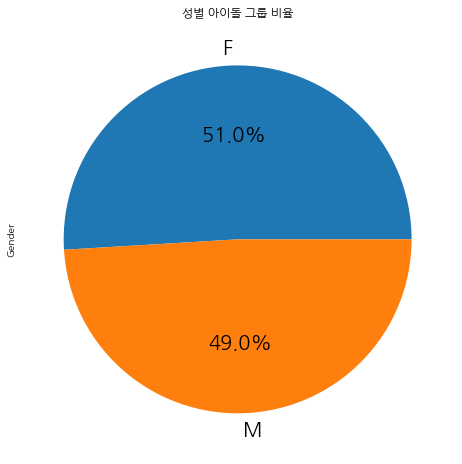

In [118]:
# 성별 아이돌 그룹 비율
gender_df = group_df['Gender'].value_counts()
gender_df.plot(kind='pie', figsize=(15,8), title = '성별 아이돌 그룹 비율', autopct='%.1f%%', fontsize=20)

#### 2. 현재 활동중인 아이돌 그룹은 얼마나 될까?

In [120]:
# 그룹별 데이터(group_df)에서 활동여부(Active)를 확인
group_df.head()

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
1,씨엘,1991-02-26,2NE1,South Korea,171.286449,F,투애니원,2009-05-06,YG,4,4,No
2,효린,1990-12-11,SISTAR,South Korea,171.286449,F,씨스타,2010-03-06,Starship,4,4,No
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.286449,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes


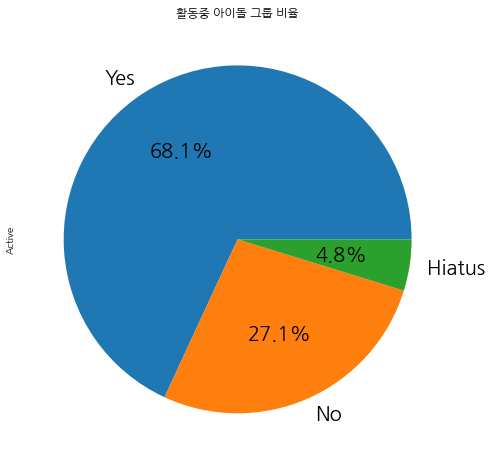

In [122]:
# 활동중인 아이돌 그룹 비율
gender_df = group_df['Active'].value_counts()
gender_df.plot(kind='pie', figsize=(15,8), title='활동중 아이돌 그룹 비율', autopct='%.1f%%', fontsize=20)

#### 3. 그룹 멤버수가 늘거나 줄어든 그룹은 얼마나 될까?

In [123]:
# 그룹별 데이터(group_df)에서 현재 멤버수(Members)와 기존 멤버수(Orig. Memb.)를 확인
group_df.head()

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
1,씨엘,1991-02-26,2NE1,South Korea,171.286449,F,투애니원,2009-05-06,YG,4,4,No
2,효린,1990-12-11,SISTAR,South Korea,171.286449,F,씨스타,2010-03-06,Starship,4,4,No
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.286449,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes


In [124]:
group_df[['Members', 'Orig. Memb.']]

,Members,Orig. Memb.
0,5,9
1,4,4
2,4,4
3,4,5
4,4,4
...,...,...
205,7,7
206,8,8
207,7,7
208,10,10


In [126]:
# 변동 멤버수 컬럼 추가
group_df['Change Memb.'] = group_df['Members'] - group_df['Orig. Memb.']

In [127]:
group_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Change Memb.
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes,-4
1,씨엘,1991-02-26,2NE1,South Korea,171.286449,F,투애니원,2009-05-06,YG,4,4,No,0
2,효린,1990-12-11,SISTAR,South Korea,171.286449,F,씨스타,2010-03-06,Starship,4,4,No,0
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus,-1
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.286449,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,주한,2001-06-21,BLITZERS,South Korea,171.286449,M,블리처스,2021-05-12,Wuzo,7,7,Yes,0
206,위시,2002-06-11,EPEX,South Korea,184.000000,M,이펙스,2021-06-08,C9,8,8,Yes,0
207,한빈,1998-01-19,TEMPEST,Vietnam,176.000000,M,템페스트,2022-03-02,Yuehua,7,7,Yes,0
208,이든,1998-03-27,NINE.i,South Korea,171.286449,M,나인아이,2022-03-30,FirstOne,10,10,Yes,0


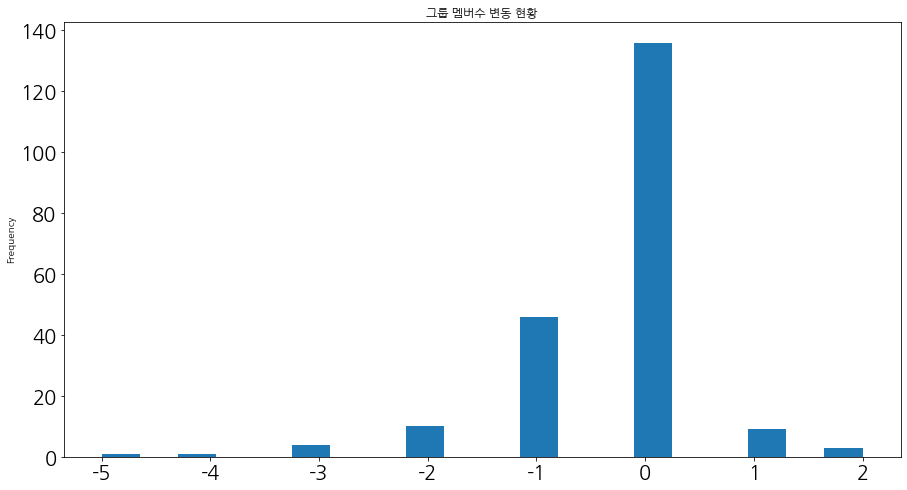

In [161]:
# 변동 멤버수 히스토그램
group_df['Change Memb.'].plot(bins=20, kind='hist', figsize=(15,8), title='그룹 멤버수 변동 현황', fontsize=20)

#### 4. 데뷔일이 최근일수록 멤버수가 많을까?

In [162]:
group_df.head()

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Change Memb.
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes,-4
1,씨엘,1991-02-26,2NE1,South Korea,171.286449,F,투애니원,2009-05-06,YG,4,4,No,0
2,효린,1990-12-11,SISTAR,South Korea,171.286449,F,씨스타,2010-03-06,Starship,4,4,No,0
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus,-1
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.286449,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes,0


In [163]:
# Debut 칼럼을 데이트타임(datetime) 자료형으로 변경
group_df['Debut'] = pd.to_datetime(group_df['Debut'])

##### 에러가 날 경우?

만일 에러가 발생할 경우 잘못된 형식의 값이 있다는 의미이므로 확인을 해야 한다.
- `.unique()` 옵션의 경우 유니크한(독특한) 값이 없는지 데이터를 쭉 보여준다.
- 이를 통해 중간에 이상한 값을 확인하자.

In [165]:
group_df['Debut'].unique()

array(['2007-08-05T00:00:00.000000000', '2009-05-06T00:00:00.000000000',
       '2010-03-06T00:00:00.000000000', '2010-07-09T00:00:00.000000000',
       '2006-03-02T00:00:00.000000000', '2011-04-19T00:00:00.000000000',
       '2012-02-16T00:00:00.000000000', '2013-07-11T00:00:00.000000000',
       '2007-02-13T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2012-10-05T00:00:00.000000000', '2015-03-19T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2010-08-12T00:00:00.000000000',
       '2015-01-15T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-05-21T00:00:00.000000000', '2013-07-20T00:00:00.000000000',
       '2012-08-31T00:00:00.000000000', '2016-06-28T00:00:00.000000000',
       '2015-04-21T00:00:00.000000000', '2014-11-17T00:00:00.000000000',
       '2009-07-29T00:00:00.000000000', '2014-06-18T00:00:00.000000000',
       '2016-08-08T00:00:00.000000000', '2014-08-26T00:00:00.000000000',
       '2009-01-15T00:00:00.000000000', '2011-05-16

여기서 이상한 값이 발견될 경우 `loc`을 활용하여 행을 찾아주자.<br>
여기선 예시로 '-0001-11-30'이라는 데이터가 섞여 있다고 가정하자.

    # .unique()로 찾은 특이한 값 확인
    group_df.loc[group_df['Debut']=='-0001-11-30']
    
    # 잘못 입력된 값 변경(or 삭제)
    group_df['Debut'] = group.df['Debut'].apply(lambda x : '2009-11-04' if x=='-0001-11-30' else x)

##### -----------------------------------------

In [166]:
# 데뷔 연도 컬럼 생성
group_df['Debut_Year'] = group_df['Debut'].dt.year

In [167]:
group_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Change Memb.,Debut_Year
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes,-4,2007
1,씨엘,1991-02-26,2NE1,South Korea,171.286449,F,투애니원,2009-05-06,YG,4,4,No,0,2009
2,효린,1990-12-11,SISTAR,South Korea,171.286449,F,씨스타,2010-03-06,Starship,4,4,No,0,2010
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus,-1,2010
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.286449,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes,0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,주한,2001-06-21,BLITZERS,South Korea,171.286449,M,블리처스,2021-05-12,Wuzo,7,7,Yes,0,2021
206,위시,2002-06-11,EPEX,South Korea,184.000000,M,이펙스,2021-06-08,C9,8,8,Yes,0,2021
207,한빈,1998-01-19,TEMPEST,Vietnam,176.000000,M,템페스트,2022-03-02,Yuehua,7,7,Yes,0,2022
208,이든,1998-03-27,NINE.i,South Korea,171.286449,M,나인아이,2022-03-30,FirstOne,10,10,Yes,0,2022


In [169]:
# 데뷔 연도 그룹별 멤버수 평균
member_df = group_df.groupby('Debut_Year')['Members'].mean()
member_df

Debut_Year
1998     6.000000
2003     2.000000
2005    11.000000
2006     4.000000
2007     4.250000
2008     4.500000
2009     4.428571
2010     4.700000
2011     5.125000
2012     4.941176
2013     4.750000
2014     5.250000
2015     6.636364
2016     7.666667
2017     7.571429
2018     7.250000
2019     5.538462
2020     6.115385
2021     6.800000
2022     7.000000
Name: Members, dtype: float64

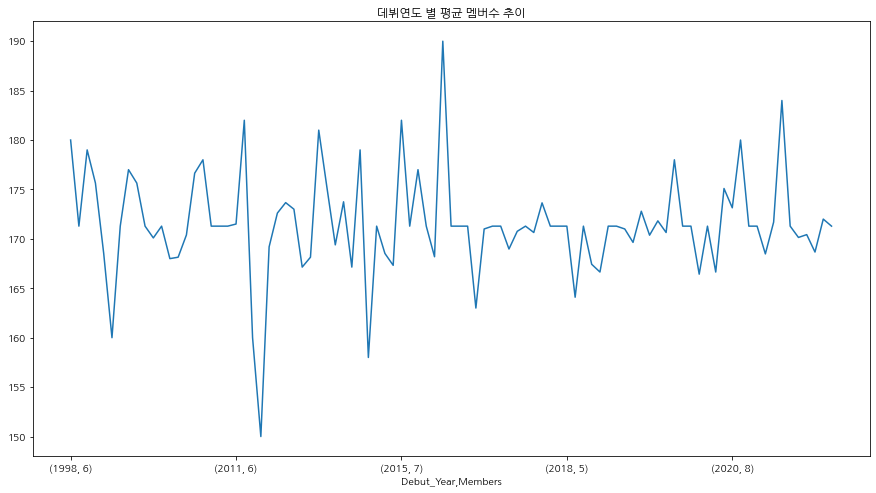

In [172]:
# 데뷔실 기준, 멤버수 추이
member_df.plot(kind='line', x='Debut', y='Members', figsize=(15,8), title='데뷔연도 별 평균 멤버수 추이')